# Shopify Data Science Challenge

Author: Ryan Z. Nie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("2019 Winter Data Science Intern Challenge.csv")
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


## EDA

In [3]:
data['created_at'] = pd.to_datetime(data['created_at'],format='%Y/%m/%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


In [4]:
print(f"Data from {min(data['created_at'])} to {max(data['created_at'])}")

Data from 2017-03-01 00:08:09 to 2017-03-30 23:55:35


`It seems like this is data from the month of March, and there are 5000 orders each with a unique 'order_id' and a time of order ('created_at'). Each order is bought from a user with a unique 'user_id' and each order comes from a store with a unique 'shop_id'. Payment method does not seem too interesting. As a Shopify shop owner, I would not care about payment methods as long as the customers pay (assuming that the shop is not a local business where paying in cash might have some tax advantages). I am interested in 'order_amount' and 'total_items' because that seems to vary with every order.`

Text(0, 0.5, 'Frequency')

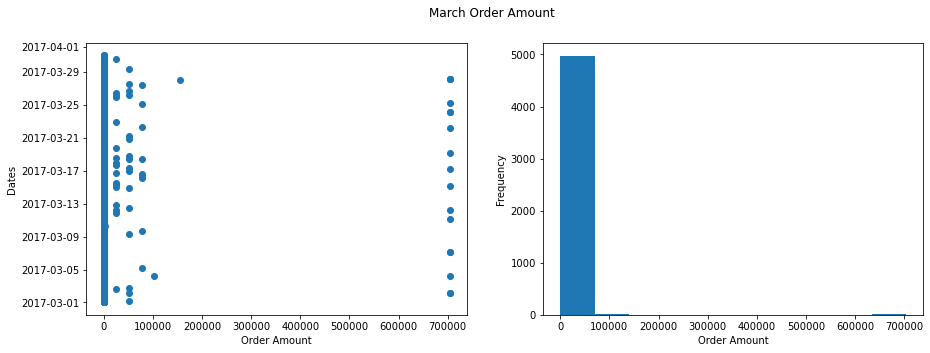

In [5]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('March Order Amount')
ax[0].scatter(data['order_amount'], data['created_at'])
ax[0].set_xlabel('Order Amount')
ax[0].set_ylabel('Dates')
ax[1].hist(data['order_amount'], bins=10);
ax[1].set_xlabel('Order Amount')
ax[1].set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

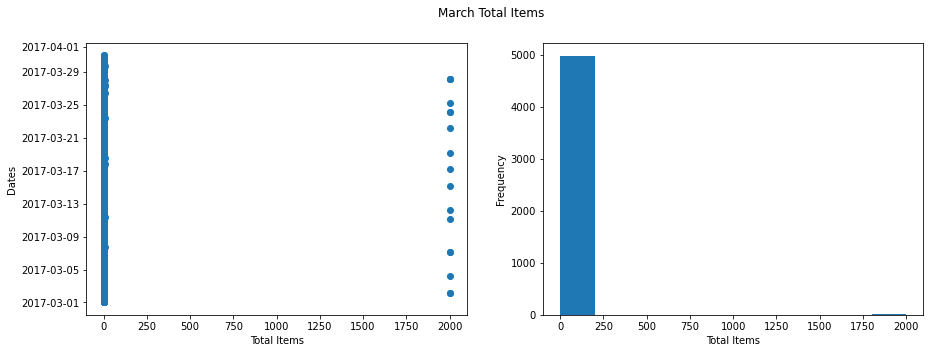

In [6]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('March Total Items')
ax[0].scatter(data['total_items'], data['created_at'])
ax[0].set_xlabel('Total Items')
ax[0].set_ylabel('Dates')
ax[1].hist(data['total_items'], bins=10);
ax[1].set_xlabel('Total Items')
ax[1].set_ylabel('Frequency')

`Interesting...there seems to be outliers for both total items and order amount. Let's see if these outliers are from the same set of users/orders.`

In [7]:
data[data['order_amount']>200000].sort_values(by=['created_at'])

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00


In [8]:
data[data['total_items']>250].equals(data[data['order_amount']>200000])

True

In [9]:
data[data['user_id']==607].equals(data[data['order_amount']>200000])

True

`They are indeed from the same set of orders and users. The same user shops from the same shop and buys the same thing and amount for about 20 days in March. Because there are so many outliers, the best metric is probably median. Let's create a boxplot to visualize this.`

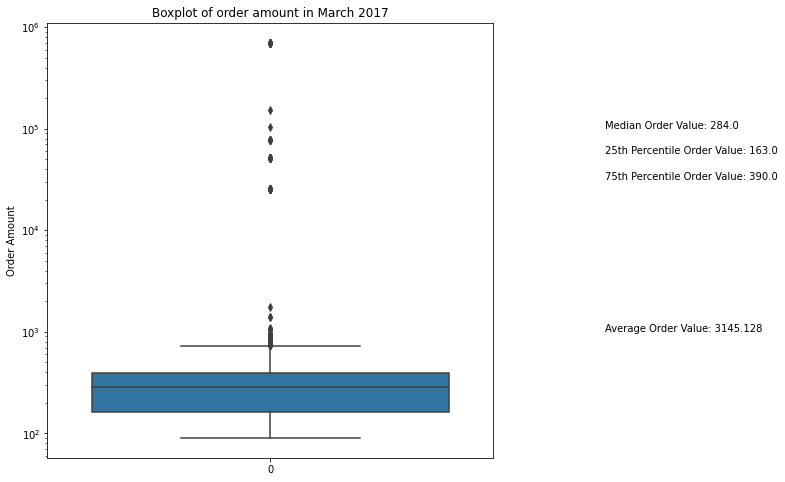

In [10]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.boxplot(data=data['order_amount'])
plt.yscale('log')
plt.title('Boxplot of order amount in March 2017')
plt.ylabel('Order Amount')
plt.text(.75, 10**5, f"Median Order Value: {np.median(data['order_amount'])}");
plt.text(.75, 10**4.75, f"25th Percentile Order Value: {np.quantile(data['order_amount'], .25)}");
plt.text(.75, 10**4.5, f"75th Percentile Order Value: {np.quantile(data['order_amount'], .75)}");
plt.text(.75, 10**3, f"Average Order Value: {sum(data['order_amount'])/5000}");

`I am curious about the descriptive statistics without the outliers.`

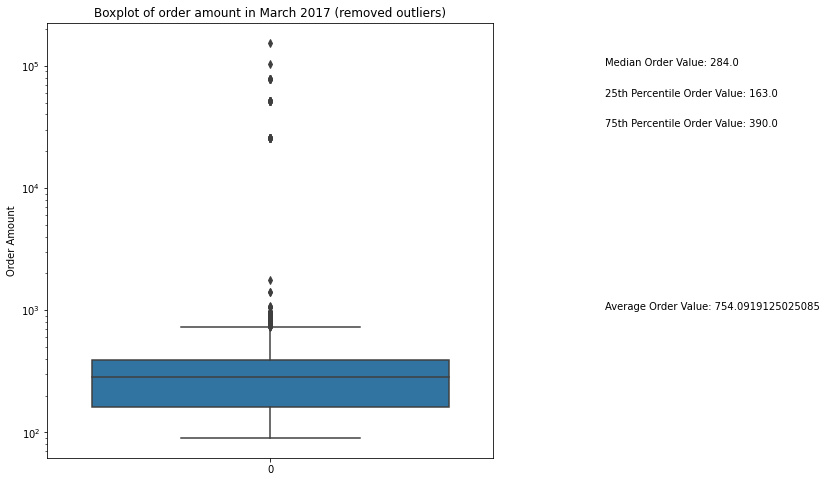

In [11]:
no_outliers=data[data['order_amount']<200000]

plt.figure(figsize=(8,8))
sns.boxplot(data=no_outliers['order_amount'])
plt.yscale('log')
plt.title('Boxplot of order amount in March 2017 (removed outliers)')
plt.ylabel('Order Amount')
plt.text(.75, 10**5, f"Median Order Value: {np.median(no_outliers['order_amount'])}");
plt.text(.75, 10**4.75, f"25th Percentile Order Value: {np.quantile(no_outliers['order_amount'], .25)}");
plt.text(.75, 10**4.5, f"75th Percentile Order Value: {np.quantile(no_outliers['order_amount'], .75)}");
plt.text(.75, 10**3, f"Average Order Value: {np.mean(no_outliers['order_amount'])}");

`Even after removing the outliers, the median, 25th, and 75th percentile are still the same. The average however, decreased significantly, which makes sense.`

## Question 1

**a)** Average order value was calculated by summing all of the order amounts and dividing by the number of orders. Because there is one customer that bought an absurd amount of sneakers from one store, the average order value is not a good metric that reflects a typical order. A better way would be using the median order value.

**b)** I would use the median. The median order amount reflects more closely to a typical order. The 25th and 75th percentile order amount can be interesting to see too, and this can be shown by using a boxplot (see above).

**c)** The median order value is 284. The 25th and 75th percentile is 163 and 390 respectively.

## Question 2

**a)** We are only interested the shipper 'Speedy Express'. So by viewing the Shippers table, we can figure out that 'Speedy Express' has a 'ShipperID' of 1. 

` -- view Shippers table
SELECT * FROM Shippers` 

` -- count how many orders have ShipperID of 1
SELECT COUNT(*) FROM Orders
WHERE ShipperID IS 1;`

**ANS: 'Speedy Express' shipped 54 total orders.**

**b)** We are interested in the last name of the employee with the most orders. Last name of employees is available in the 'Employees' table, so I wanted to join 'Orders' and 'Employees' tables together. After joining them, I can group by each employee and count each orders that they do. After that, I can order by descending order and find the employee with the most orders. For sanity sake, I also made sure all the employee orders sum up to the same number of total orders.

`SELECT e.LastName, COUNT(o.OrderID) AS counts
FROM Employees AS e
JOIN Orders AS o ON e.EmployeeID = o.EmployeeID
GROUP BY LastName
ORDER BY counts DESC
LIMIT 1;`

**ANS: Peacock completed the most orders at 40 orders.**

**c)** We are interested in the most bought product for customers in Germany. So first I am going to create a view for just customers in Germany. This view contains all the orders from Germany. Using this view, I will select the product that is most bought (most in terms of quantity). I will join together multiple tables and then sum the quantities by product names.

`-- filter to only Germany customers
CREATE VIEW German AS
SELECT c.Country, o.*
FROM Customers AS c
JOIN Orders AS o ON o.CustomerID = c.CustomerID
WHERE Country IS 'Germany';`

`-- find product with the most quantity ordered
SELECT p.ProductName, SUM(d.Quantity) AS quant
FROM German AS g 
JOIN OrderDetails AS d ON d.OrderID = g.OrderID JOIN Products AS p ON p.ProductID = d.ProductID
GROUP BY ProductName
ORDER BY quant DESC
LIMIT 1;`

After this approach, I simplified it to this:

`-- a simpler way with multiple joins 
SELECT p.ProductName, SUM(Quantity) AS quant
FROM Products AS p
JOIN OrderDetails AS d ON p.ProductID = d.ProductID 
	JOIN Customers AS c ON d.OrderID = o.OrderID 
    JOIN Orders AS o ON o.CustomerID = c.CustomerID
WHERE c.Country = 'Germany'
GROUP BY ProductName
ORDER BY quant DESC
LIMIT 1;`

**ANS: Boston Crab Meat is the most ordered by Germany at 160 quantity.**